# MATH2504 Project 2 2022 Semester 2 Submission

[Assignment Instructions](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/project2.html)

Student names: Limao Chang, Tiarne Graves

In [1]:
include("src/GeneralizedJacksonSim.jl")
using .GeneralizedJacksonSim

In [2]:
using Accessors
using LinearAlgebra
using Plots
using Random

## Perspective Seminar

## Task 1

Features of amusement park that are not captured by model:
- Amusement park attractions usually serve multiple people simultaneously, whereas the model assumes jobs can only be serviced one at a time
- People may cut in line and skip queues, so in reality it is not really a queue in the first-in, first-out (FIFO) sense

Model assumptions that are unrealistic for the application of a theme park:
- Assuming that queues (and by extension the theme park) have infinite capacity
- Assuming that people will unconditionally stay in a queue until they get to the front of the line - they may leave because the queue is too long, they want to go to another attraction, etc.
- Assuming that the time taken to move between attractions or leave the theme park is instant, as travelling between attractions takes time
- Service duration is independent from all other services - if people are at the theme park together as a party (e.g. a family travelling around the theme park), their service durations will not be independent from each other
- Arrival of jobs to nodes is exponentially distributed

Answer:  If you were actually using this model to assess congestion at the park, would it be useful or not?


## Task 2

The total steady state mean queue lengths are plotted against $\rho$* below for the four scenarios.

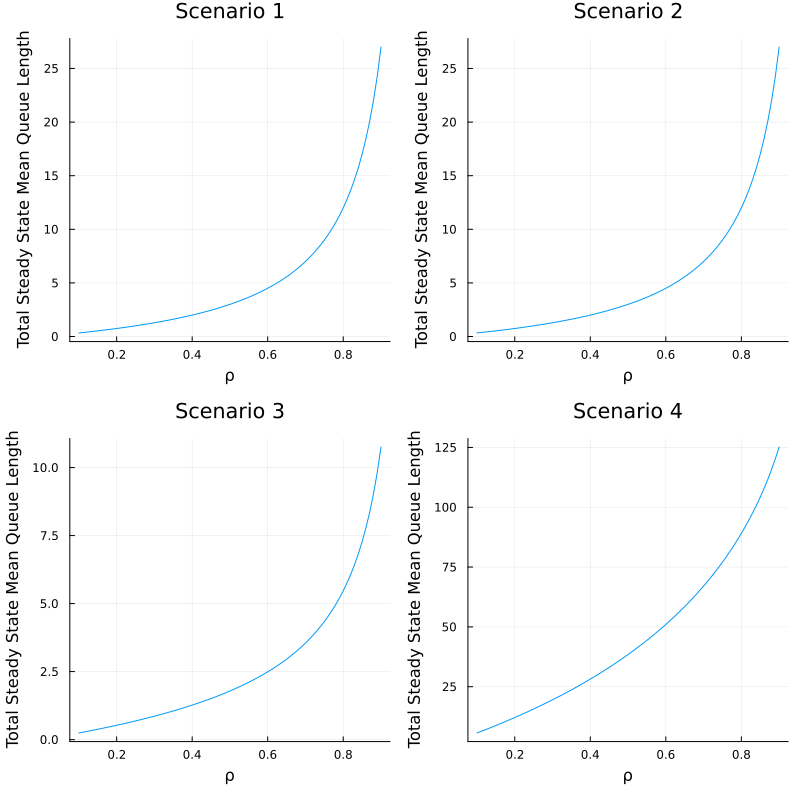

In [4]:
# Three queues in tandem
scenario1 = NetworkParameters(L=3, 
                              α_vector = [0.5, 0, 0],
                              μ_vector = ones(3),
                              P = [0 1.0 0;
                                   0 0 1.0;
                                   0 0 0])

# Three queues in tandem with option to return back to first queue
scenario2 = @set scenario1.P  = [0 1.0 0; #The @set macro is from Accessors.jl and allows to easily make a 
                                 0 0 1.0; # modified copied of an (immutable) struct
                                 0.3 0 0] 

# A ring of 5 queues
scenario3 = NetworkParameters(L=5, 
                              α_vector = ones(5),
                              μ_vector = collect(1:5),
                              P = [0  .8   0    0   0;
                                   0   0   .8   0   0;
                                   0   0   0    .8  0;
                                   0   0   0    0   .8;
                                   .8  0   0    0    0])

# A large arbitrary network
# Generate some random(arbitrary) matrix P
Random.seed!(0)
L = 100
P = rand(L,L)
P = P ./ sum(P, dims=2)  # normalize rows by the sum
P = P .* (0.2 .+ 0.7rand(L))  # multiply rows by factors in [0.2,0.9] 

scenario4 = NetworkParameters(L=L, 
                              α_vector = ones(L),
                              μ_vector = 0.5 .+ rand(L),
                              P = P);

"""
    plot_total_ss_mean_queue_length(net::NetworkParameters)

Plots total steady state mean queue length as a function of ρ* for the given scenario.
"""
function plot_total_ss_mean_queue_length(net::NetworkParameters, scenario_number::Int64)
    ρ_star_values = 0.1:0.01:0.9
    total_ss_mean_queue_lengths = zeros(length(ρ_star_values))

    for (index, ρ_star) in enumerate(ρ_star_values)
        # adjust network parameters
        adjusted_scenario = set_scenario(net, ρ_star)
        ρ = compute_ρ(adjusted_scenario)
        # get total steady state mean queue length
        total_ss_mean_queue_lengths[index] = sum(ρ ./ (1 .- ρ))
    end

    return plot(ρ_star_values,
                total_ss_mean_queue_lengths,
                xlabel="ρ",
                ylabel="Total Steady State Mean Queue Length",
                title="Scenario $scenario_number")
end

p1 = plot_total_ss_mean_queue_length(scenario1, 1)
p2 = plot_total_ss_mean_queue_length(scenario2, 2)
p3 = plot_total_ss_mean_queue_length(scenario3, 3)
p4 = plot_total_ss_mean_queue_length(scenario4, 4)
        
plot(p1, p2, p3, p4, layout=(2, 2), legend=false, size=(800, 800))

## Task 3

## Task 4

## Task 5